In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class CustomKMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, X):

        indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[indices]

        for i in range(self.max_iters):
            labels = self._assign_labels(X)
            new_centroids = np.array([
                X[labels == j].mean(axis=0) if np.any(labels == j) else self.centroids[j]
                for j in range(self.k)
            ])

            shift = np.linalg.norm(self.centroids - new_centroids)

            if shift < self.tol:
                print(f"Converged at iteration {i}")
                break

            self.centroids = new_centroids

    def predict(self, X):
        return self._assign_labels(X)

    def _assign_labels(self, X):

        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


Converged at iteration 6


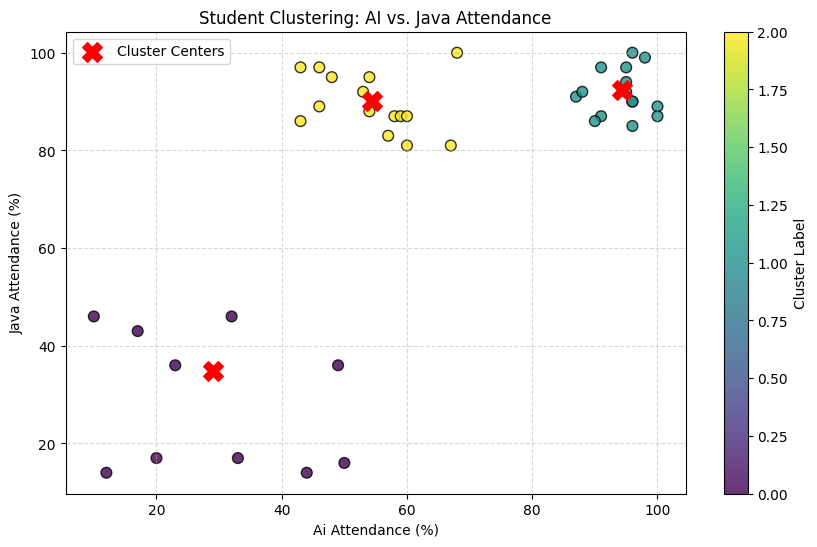

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

group_1 = np.random.randint(85, 101, size=(15, 4))

g2_AI_Cpp = np.random.randint(40, 70, size=(15, 2))
g2_S_Java = np.random.randint(80, 101, size=(15, 2))
group_2 = np.hstack((g2_AI_Cpp, g2_S_Java))

group_3 = np.random.randint(10, 51, size=(10, 4))

X = np.vstack((group_1, group_2, group_3))

np.random.shuffle(X)

courses = ['AI', 'C++', 'Java', 'S']
df = pd.DataFrame(X, columns=courses)


kmeans = CustomKMeans(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)


plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['AI'], df['Java'], c=labels, cmap='viridis', s=60, alpha=0.8, edgecolor='k')

# Plot the Centroids (only columns 0 (Math) and 3 (Art))
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 3],
            c='red', s=200, marker='X', label='Cluster Centers')

plt.title("Student Clustering: AI vs. Java Attendance")
plt.xlabel("Ai Attendance (%)")
plt.ylabel("Java Attendance (%)")
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

